In [3]:
import pandas as pd
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
df = pd.read_csv("user_behavior_dataset_cleaned.csv")
df = df.drop(columns=['User_ID'])
df.head()

,Device_Model,Operating_System,App_Usage_Time,Screen_On_Time,Battery_Drain,Number_of_Apps_Installed,Data_Usage,Age,Gender,User_Behavior_Class,App_Usage_Time_outlier,Screen_On_Time_outlier,Battery_Drain_outlier,Data_Usage_outlier
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,False,False,False,False
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,False,False,False,False
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,False,False,False,False
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,False,False,False,False
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,False,False,False,False


In [22]:
x= df.drop(columns=['Screen_On_Time'])
y= df['Screen_On_Time']

x_encoded = pd.get_dummies(x)  # one hot encoding for categorical variables

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

In [24]:
model = ElasticNetCV(cv=5, l1_ratio=[.1, .5, .9, 1], random_state=42)
model.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9, 1], random_state=42)

In [25]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.6701
R² Score: 0.9253


Text(0.5, 1.0, 'Elastic Net Regressor - Actual vs Predicted')

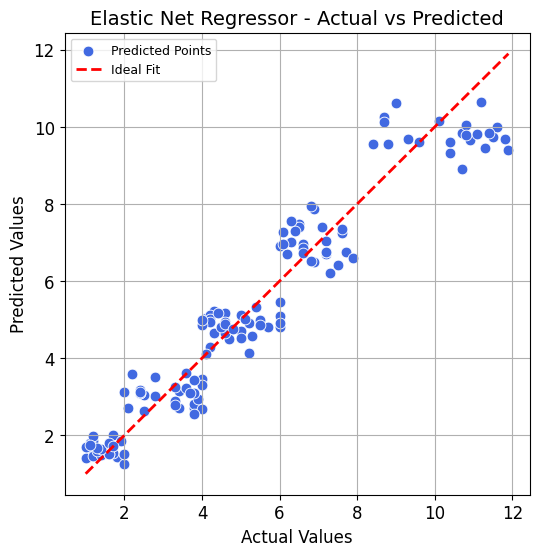

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predicted vs actual
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', edgecolor='w', s=60, label='Predicted Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2, label='Ideal Fit')
plt.legend(fontsize=9)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Actual Values', fontsize = 12)
plt.ylabel('Predicted Values', fontsize = 12)
plt.title('Elastic Net Regressor - Actual vs Predicted', fontsize = 14)